In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

In [2]:
flood = pd.read_csv('med_center_flood.csv')
flood = wrangle.clean_flood(flood)
flood.sample(1)

,datetime,Sensor_id,Vendor,SensorModel,Zone,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters,flood_alert
3619,2021-05-22 14:25:00,61447,ITRON,AU500,Medical Center,0.225,0.0686,13.500656,4.115,13.275656,4.0464,Major Risk !


In [3]:
flood['weekday'] = pd.to_datetime(flood['datetime']).dt.weekday
flood['time'] = pd.to_datetime(flood['datetime']).dt.time
flood['hour'] = pd.to_datetime(flood['datetime']).dt.hour
flood['month'] = pd.to_datetime(flood['datetime']).dt.month
flood['year'] = pd.to_datetime(flood['datetime']).dt.year
flood.sample(1)

,datetime,Sensor_id,Vendor,SensorModel,Zone,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters,flood_alert,weekday,time,hour,month,year
13626,2021-06-01 14:00:00,61447,ITRON,AU500,Medical Center,0.2583,0.0787,13.500656,4.115,13.242356,4.0363,Major Risk !,1,14:00:00,14,6,2021


In [4]:
flood_train, flood_validate, flood_test = wrangle.split_data(flood)

___
# Explore Flood

In [6]:
flood.flood_alert.value_counts()

Major Risk !     17870
No Risk           7176
Minor Risk         224
Moderate Risk      123
Name: flood_alert, dtype: int64

___

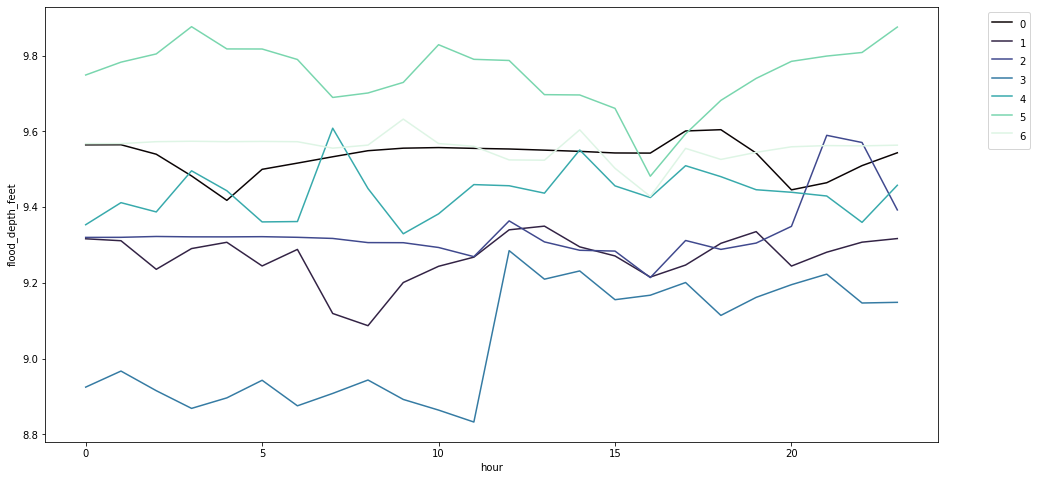

In [7]:
plt.figure(figsize=(16,8))
sns.lineplot(y=flood.flood_depth_feet, x=flood.hour, 
             hue=flood.weekday, palette='mako', ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

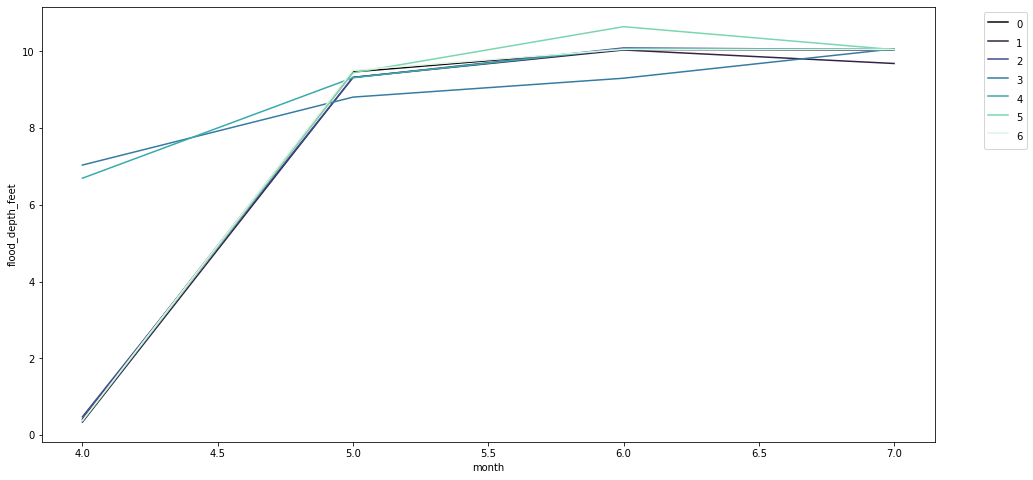

In [8]:
plt.figure(figsize=(16,8))
sns.lineplot(y=flood.flood_depth_feet, x=flood.month, 
             hue=flood.weekday, palette='mako', ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

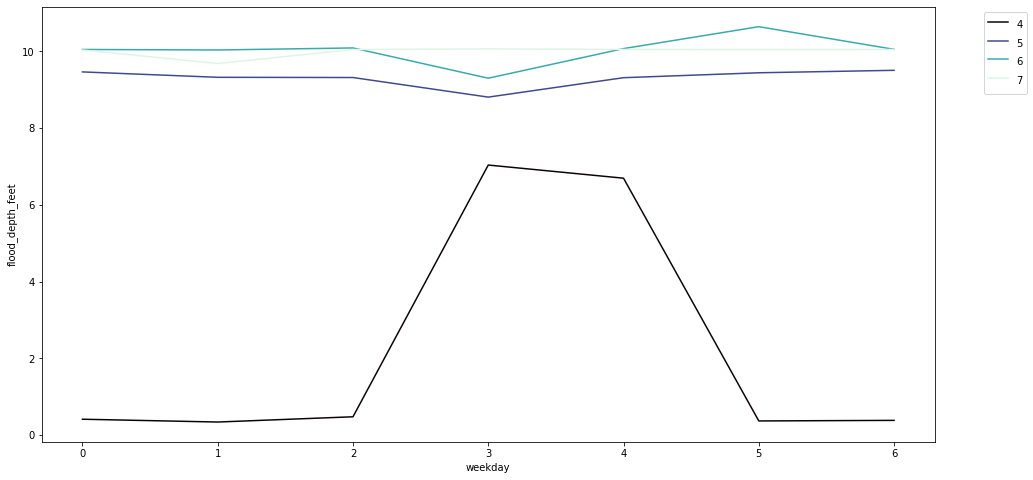

In [9]:
plt.figure(figsize=(16,8))
sns.lineplot(y=flood.flood_depth_feet, x=flood.weekday, 
             hue=flood.month, palette='mako', ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

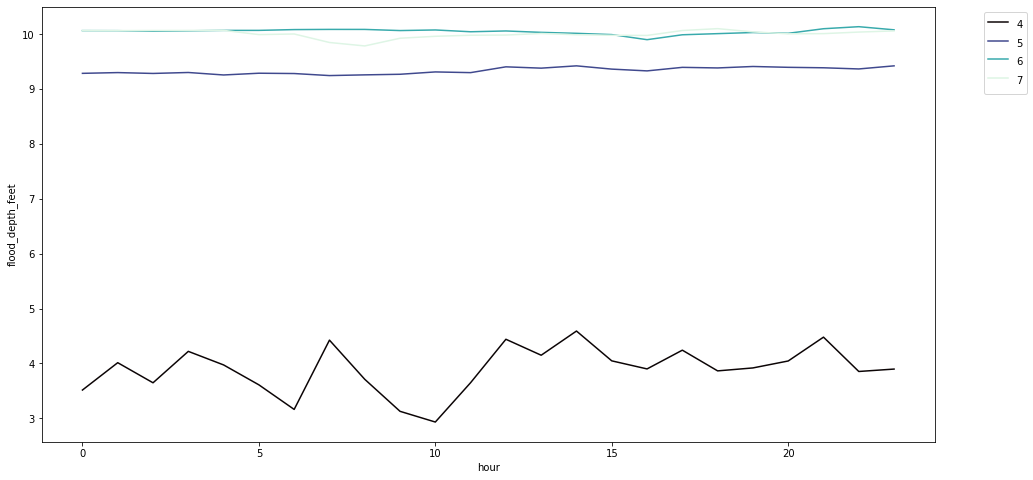

In [10]:
plt.figure(figsize=(16,8))
sns.lineplot(y=flood.flood_depth_feet, x=flood.hour, 
             hue=flood.month, palette='mako', ci=None)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

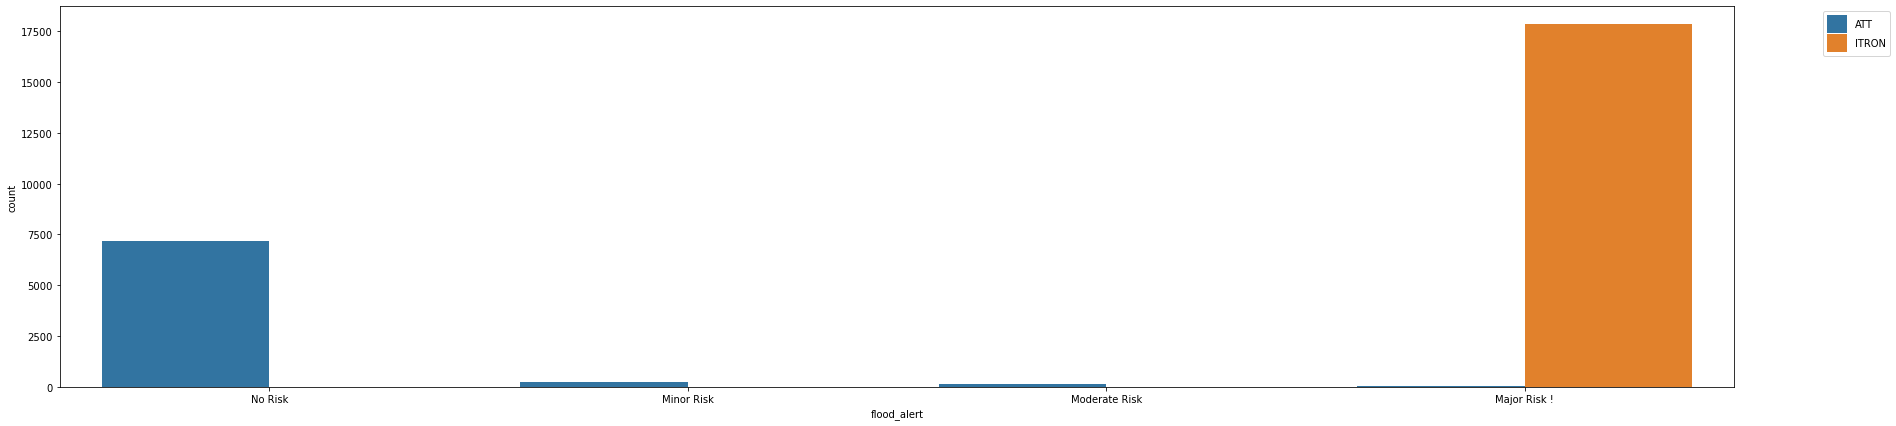

In [13]:
plt.figure(figsize=(30,7))
sns.countplot(data=flood, hue='Vendor', x='flood_alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

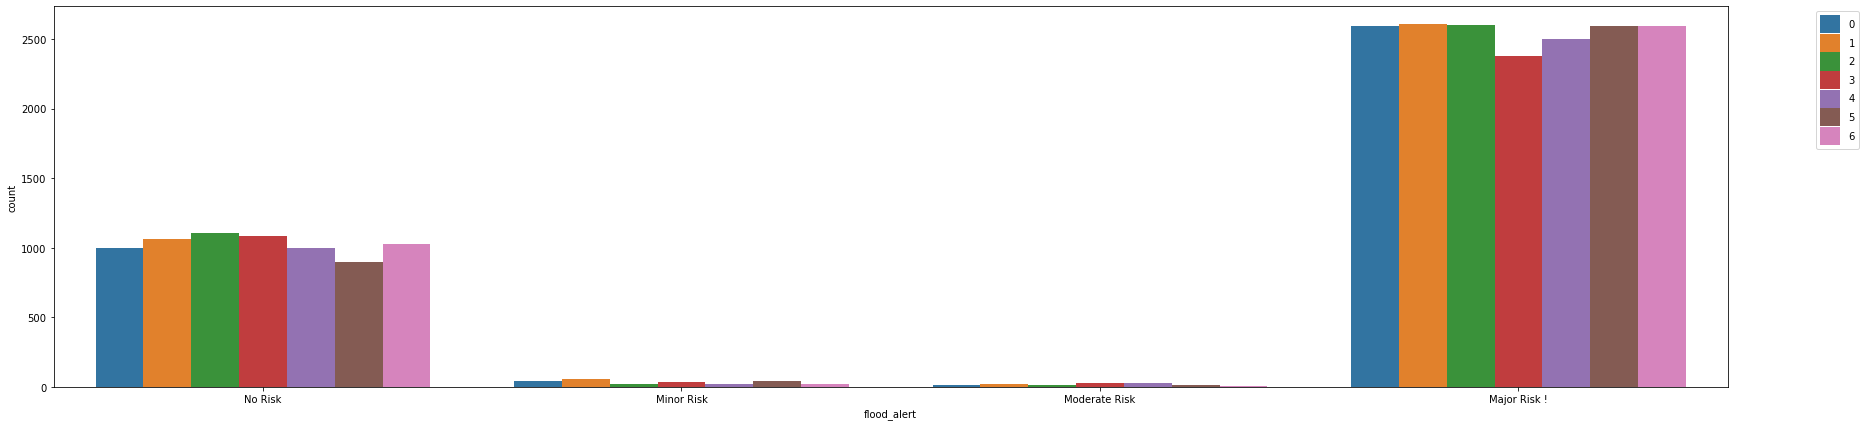

In [17]:
plt.figure(figsize=(30,7))
sns.countplot(data=flood, hue='weekday', x='flood_alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

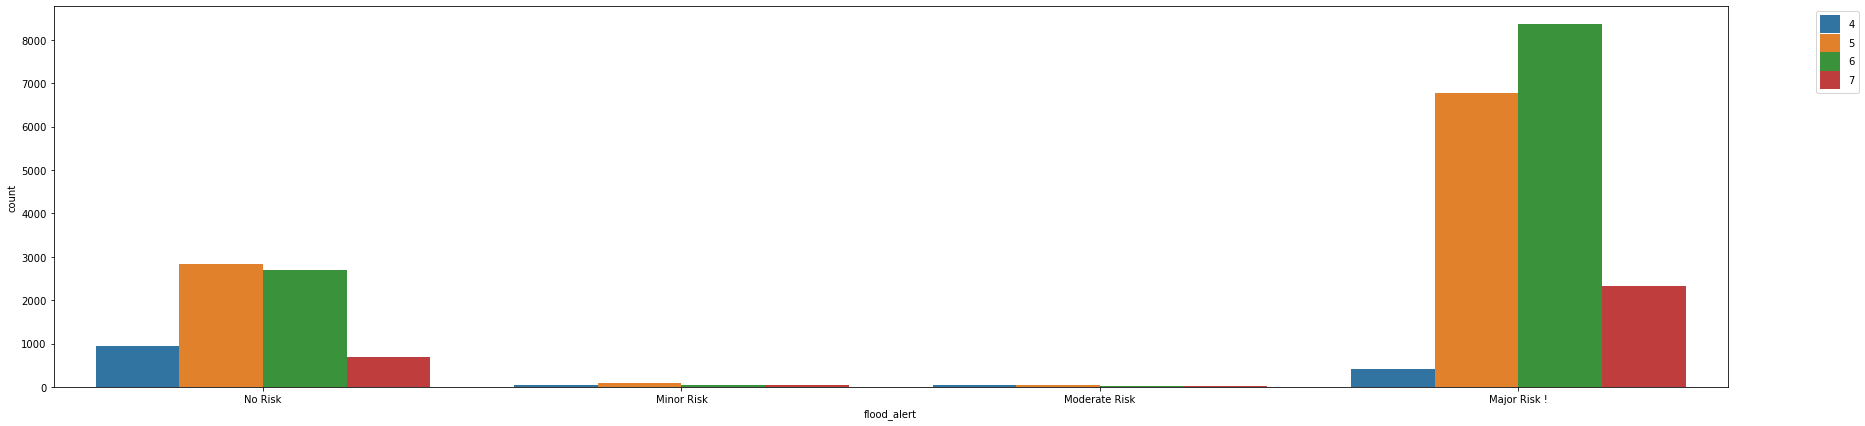

In [18]:
plt.figure(figsize=(30,7))
sns.countplot(data=flood, hue='month', x='flood_alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

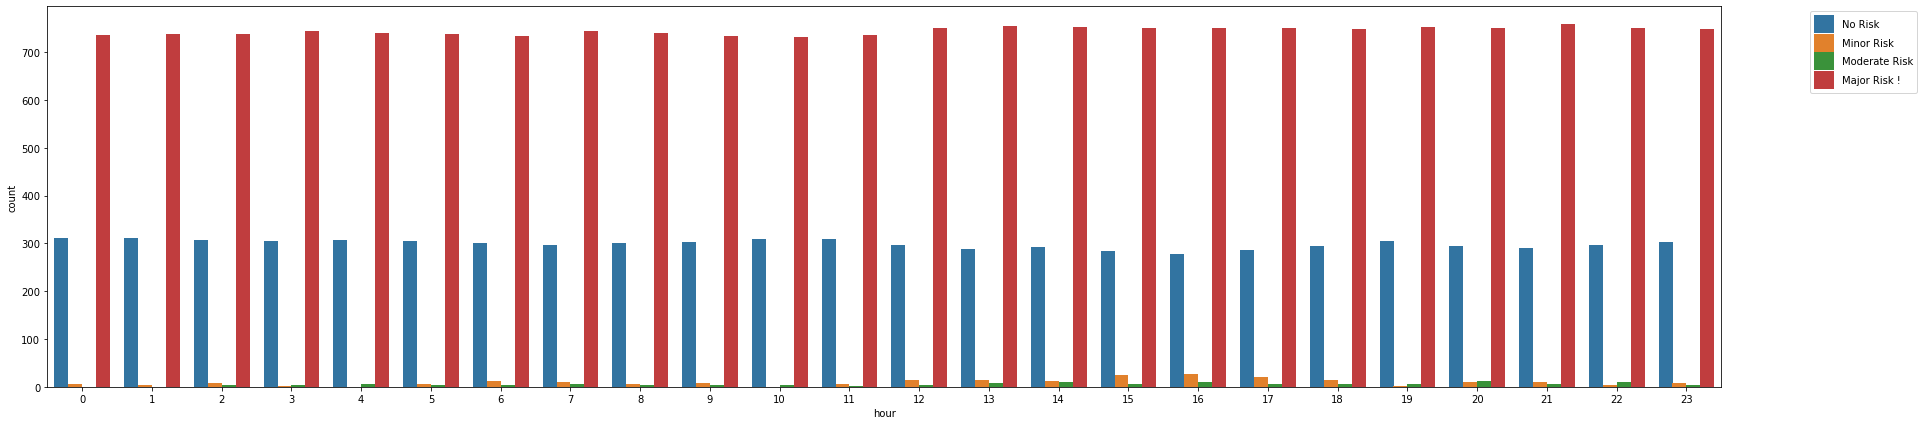

In [20]:
plt.figure(figsize=(30,7))
sns.countplot(data=flood, x='hour', hue='flood_alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 30.0)]

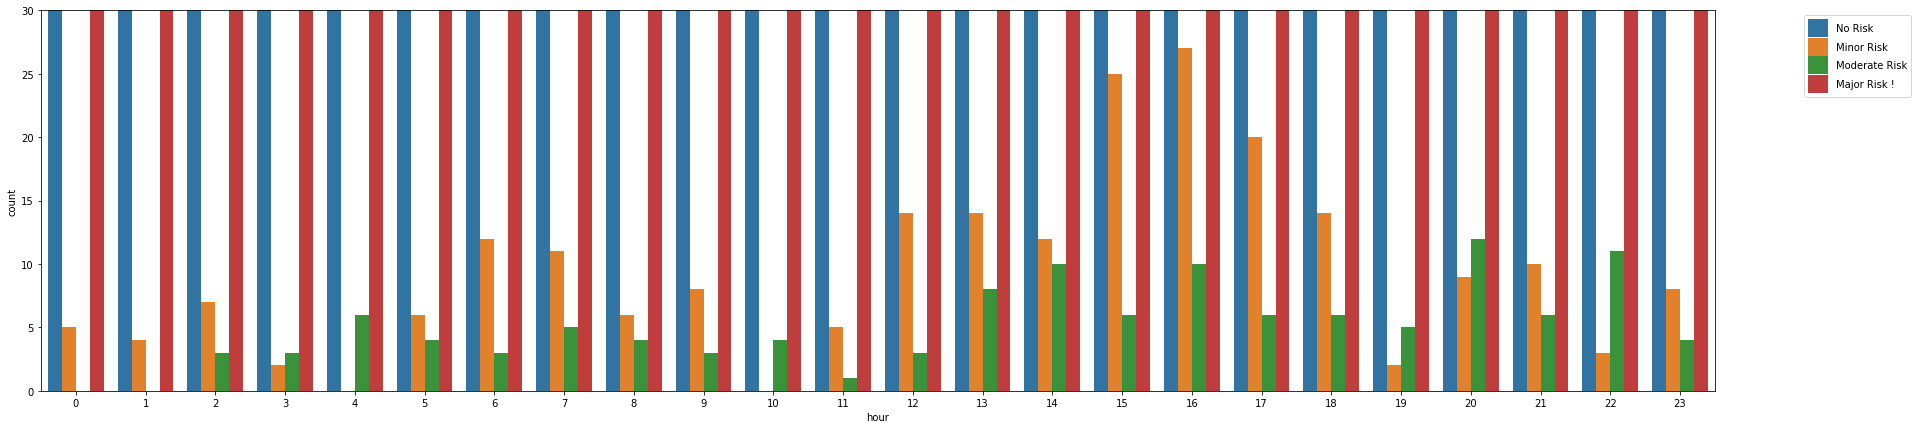

In [23]:
plt.figure(figsize=(30,7))
plot = sns.countplot(data=flood, x='hour', hue='flood_alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 30))

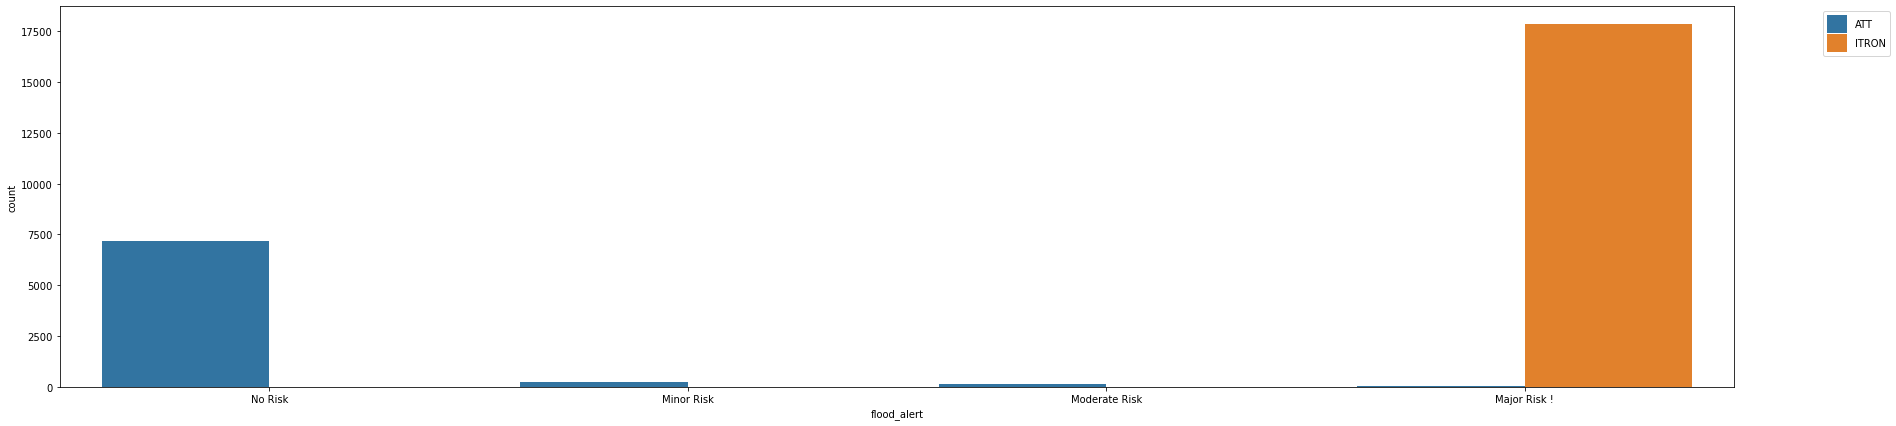

In [25]:
plt.figure(figsize=(30,7))
sns.countplot(data=flood, hue='Vendor', x='flood_alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [15]:
flood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25393 entries, 0 to 27553
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime                 25393 non-null  datetime64[ns]
 1   Sensor_id                25393 non-null  int64         
 2   Vendor                   25393 non-null  object        
 3   SensorModel              25393 non-null  object        
 4   Zone                     25393 non-null  object        
 5   sensor_to_water_feet     25393 non-null  float64       
 6   sensor_to_water_meters   25393 non-null  float64       
 7   sensor_to_ground_feet    25393 non-null  float64       
 8   sensor_to_ground_meters  25393 non-null  float64       
 9   flood_depth_feet         25393 non-null  float64       
 10  flood_depth_meters       25393 non-null  float64       
 11  flood_alert              25393 non-null  object        
 12  weekday                  25393 n